# Problem Statement

### Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.). 



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost. 
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models. 
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

# Importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay 


# To tune models, get different metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)

# To split data
from sklearn.model_selection import (
        train_test_split, 
        StratifiedKFold, 
        cross_val_score
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import (
        StandardScaler, 
        MinMaxScaler, 
)

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline

# To define maximum number of columns to be displayed in a dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

#To suppress scientific notations
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#To suppress warnings
import warnings
warnings.filterwarnings('ignore')


# Loading the dataset

In [ ]:
# mount Google Drive to upload data from the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# download, read & assign data to a variable
pd.read_csv('/content/drive/MyDrive/DataSets/Train.csv')
pd.read_csv('/content/drive/MyDrive/DataSets/Test.csv')
tr_data = pd.read_csv('/content/drive/MyDrive/DataSets/Train.csv')
ts_data = pd.read_csv('/content/drive/MyDrive/DataSets/Test.csv')

# Data Overview

The initial steps to get an overview of any dataset is to: 
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

 Display the first few rows of the dataset

In [ ]:
#create a copy of the train and test data
train_data = tr_data.copy()
test_data = ts_data.copy()

In [ ]:
# view the first 5 rows of the train datasets
train_data.head()

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  \
0 -4.465 -4.679  3.102  0.506 -0.221 -2.033 -2.911  0.051 -1.522  3.762   
1  3.366  3.653  0.910 -1.368  0.332  2.359  0.733 -4.332  0.566 -0.101   
2 -3.832 -5.824  0.634 -2.419 -1.774  1.017 -2.099 -3.173 -2.082  5.393   
3  1.618  1.888  7.046 -1.147  0.083 -1.530  0.207 -2.494  0.345  2.119   
4 -0.111  3.872 -3.758 -2.983  3.793  0.545  0.205  4.849 -1.855 -6.220   

     V11    V12    V13    V14    V15    V16    V17    V18    V19    V20  \
0 -5.715  0.736  0.981  1.418 -3.376 -3.047  0.306  2.914  2.270  4.395   
1  1.914 -0.951 -1.255 -2.707  0.193 -4.769 -2.205  0.908  0.757 -5.834   
2 -0.771  1.107  1.144  0.943 -3.164 -4.248 -4.039  3.689  3.311  1.059   
3 -3.053  0.460  2.705 -0.636 -0.454 -3.174 -3.404 -1.282  1.582 -1.952   
4  1.998  4.724  0.709 -1.989 -2.633  4.184  2.245  3.734 -6.313 -5.380   

     V21    V22    V23    V24    V25    V26    V27    V28    V29    V30  \
0 -2.388  0.646 -1.191  3.133  0.665 -2.511 -0.037  0.726 -3.982 -1.073   
1 -3.065  1.597 -1.757  1.766 -0.267  3.625  1.500 -0.586  0.783 -0.201   
2 -2.143  1.650 -1.661  1.680 -0.451 -4.551  3.739  1.134 -2.034  0.841   
3 -3.517 -1.206 -5.628 -1.818  2.124  5.295  4.748 -2.309 -3.963 -6.029   
4 -0.887  2.062  9.446  4.490 -3.945  4.582 -8.780 -3.383  5.107  6.788   

     V31    V32    V33     V34   V35    V36    V37    V38    V39    V40  \
0  1.667  3.060 -1.690   2.846 2.235  6.667  0.444 -2.369  2.951 -3.480   
1  0.025 -1.795  3.033  -2.468 1.895 -2.298 -1.731  5.909 -0.386  0.616   
2 -1.600 -0.257  0.804   4.086 2.292  5.361  0.352  2.940  3.839 -4.309   
3  4.949 -3.584 -2.577   1.364 0.623  5.550 -1.527  0.139  3.101 -1.277   
4  2.044  8.266  6.629 -10.069 1.223 -3.230  1.687 -2.164 -3.645  6.510   

   Target  
0       0  
1       0  
2       0  
3       0  
4       0

In [ ]:
# view the first 5 rows of the test datasets
test_data.head()

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  \
0 -0.613 -3.820  2.202  1.300 -1.185 -4.496 -1.836  4.723  1.206 -0.342   
1  0.390 -0.512  0.527 -2.577 -1.017  2.235 -0.441 -4.406 -0.333  1.967   
2 -0.875 -0.641  4.084 -1.590  0.526 -1.958 -0.695  1.347 -1.732  0.466   
3  0.238  1.459  4.015  2.534  1.197 -3.117 -0.924  0.269  1.322  0.702   
4  5.828  2.768 -1.235  2.809 -1.642 -1.407  0.569  0.965  1.918 -2.775   

     V11    V12    V13    V14    V15    V16    V17    V18    V19    V20  \
0 -5.123  1.017  4.819  3.269 -2.984  1.387  2.032 -0.512 -1.023  7.339   
1  1.797  0.410  0.638 -1.390 -1.883 -5.018 -3.827  2.418  1.762 -3.242   
2 -4.928  3.565 -0.449 -0.656 -0.167 -1.630  2.292  2.396  0.601  1.794   
3 -5.578 -0.851  2.591  0.767 -2.391 -2.342  0.572 -0.934  0.509  1.211   
4 -0.530  1.375 -0.651 -1.679 -0.379 -4.443  3.894 -0.608  2.945  0.367   

     V21   V22    V23    V24    V25    V26    V27    V28    V29    V30    V31  \
0 -2.242 0.155  2.054 -2.772  1.851 -1.789 -0.277 -1.255 -3.833 -1.505  1.587   
1 -3.193 1.857 -1.708  0.633 -0.588  0.084  3.014 -0.182  0.224  0.865 -1.782   
2 -2.120 0.482 -0.841  1.790  1.874  0.364 -0.169 -0.484 -2.119 -2.157  2.907   
3 -3.260 0.105 -0.659  1.498  1.100  4.143 -0.248 -1.137 -5.356 -4.546  3.809   
4 -5.789 4.598  4.450  3.225  0.397  0.248 -2.362  1.079 -0.473  2.243 -3.591   

     V32    V33    V34   V35    V36    V37     V38    V39    V40  Target  
0  2.291 -5.411  0.870 0.574  4.157  1.428 -10.511  0.455 -1.448       0  
1 -2.475  2.494  0.315 2.059  0.684 -0.485   5.128  1.721 -1.488       0  
2 -1.319 -2.997  0.460 0.620  5.632  1.324  -1.752  1.808  1.676       0  
3  3.518 -3.074 -0.284 0.955  3.029 -1.367  -3.412  0.906 -2.451       0  
4  1.774 -1.502 -2.227 4.777 -6.560 -0.806  -0.276 -3.858 -0.538       0

 Check the shape of the dataset

In [ ]:
train_data.shape

(20000, 41)

In [ ]:
test_data.shape

(5000, 41)

Check the data types of the columns for the dataset

In [ ]:
#check the data types of the columns in the dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

 Check for duplicate values

In [ ]:
#check for duplicate values in the train datasets
train_data.duplicated().sum()

0

In [ ]:
#check for duplicate values in the train datasets
test_data.duplicated().sum()

0

Check for missing values

In [ ]:
#check for missing values in the data
train_data.isnull().sum()

V1        18
V2        18
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

In [ ]:
#check for missing values in the data
test_data.isnull().sum()

V1        5
V2        6
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64

Statistical summary of the dataset

In [ ]:
#view the statistical summary of the numerical columns in the data
train_data.describe().T

count   mean   std     min    25%    50%    75%    max
V1     19982.000 -0.272 3.442 -11.876 -2.737 -0.748  1.840 15.493
V2     19982.000  0.440 3.151 -12.320 -1.641  0.472  2.544 13.089
V3     20000.000  2.485 3.389 -10.708  0.207  2.256  4.566 17.091
V4     20000.000 -0.083 3.432 -15.082 -2.348 -0.135  2.131 13.236
V5     20000.000 -0.054 2.105  -8.603 -1.536 -0.102  1.340  8.134
V6     20000.000 -0.995 2.041 -10.227 -2.347 -1.001  0.380  6.976
V7     20000.000 -0.879 1.762  -7.950 -2.031 -0.917  0.224  8.006
V8     20000.000 -0.548 3.296 -15.658 -2.643 -0.389  1.723 11.679
V9     20000.000 -0.017 2.161  -8.596 -1.495 -0.068  1.409  8.138
V10    20000.000 -0.013 2.193  -9.854 -1.411  0.101  1.477  8.108
V11    20000.000 -1.895 3.124 -14.832 -3.922 -1.921  0.119 11.826
V12    20000.000  1.605 2.930 -12.948 -0.397  1.508  3.571 15.081
V13    20000.000  1.580 2.875 -13.228 -0.224  1.637  3.460 15.420
V14    20000.000 -0.951 1.790  -7.739 -2.171 -0.957  0.271  5.671
V15    20000.000 -2.415 3.355 -16.417 -4.415 -2.383 -0.359 12.246
V16    20000.000 -2.925 4.222 -20.374 -5.634 -2.683 -0.095 13.583
V17    20000.000 -0.134 3.345 -14.091 -2.216 -0.015  2.069 16.756
V18    20000.000  1.189 2.592 -11.644 -0.404  0.883  2.572 13.180
V19    20000.000  1.182 3.397 -13.492 -1.050  1.279  3.493 13.238
V20    20000.000  0.024 3.669 -13.923 -2.433  0.033  2.512 16.052
V21    20000.000 -3.611 3.568 -17.956 -5.930 -3.533 -1.266 13.840
V22    20000.000  0.952 1.652 -10.122 -0.118  0.975  2.026  7.410
V23    20000.000 -0.366 4.032 -14.866 -3.099 -0.262  2.452 14.459
V24    20000.000  1.134 3.912 -16.387 -1.468  0.969  3.546 17.163
V25    20000.000 -0.002 2.017  -8.228 -1.365  0.025  1.397  8.223
V26    20000.000  1.874 3.435 -11.834 -0.338  1.951  4.130 16.836
V27    20000.000 -0.612 4.369 -14.905 -3.652 -0.885  2.189 17.560
V28    20000.000 -0.883 1.918  -9.269 -2.171 -0.891  0.376  6.528
V29    20000.000 -0.986 2.684 -12.579 -2.787 -1.176  0.630 10.722
V30    20000.000 -0.016 3.005 -14.796 -1.867  0.184  2.036 12.506
V31    20000.000  0.487 3.461 -13.723 -1.818  0.490  2.731 17.255
V32    20000.000  0.304 5.500 -19.877 -3.420  0.052  3.762 23.633
V33    20000.000  0.050 3.575 -16.898 -2.243 -0.066  2.255 16.692
V34    20000.000 -0.463 3.184 -17.985 -2.137 -0.255  1.437 14.358
V35    20000.000  2.230 2.937 -15.350  0.336  2.099  4.064 15.291
V36    20000.000  1.515 3.801 -14.833 -0.944  1.567  3.984 19.330
V37    20000.000  0.011 1.788  -5.478 -1.256 -0.128  1.176  7.467
V38    20000.000 -0.344 3.948 -17.375 -2.988 -0.317  2.279 15.290
V39    20000.000  0.891 1.753  -6.439 -0.272  0.919  2.058  7.760
V40    20000.000 -0.876 3.012 -11.024 -2.940 -0.921  1.120 10.654
Target 20000.000  0.056 0.229   0.000  0.000  0.000  0.000  1.000

# Exploratory Data Analysis

## Univariate analysis

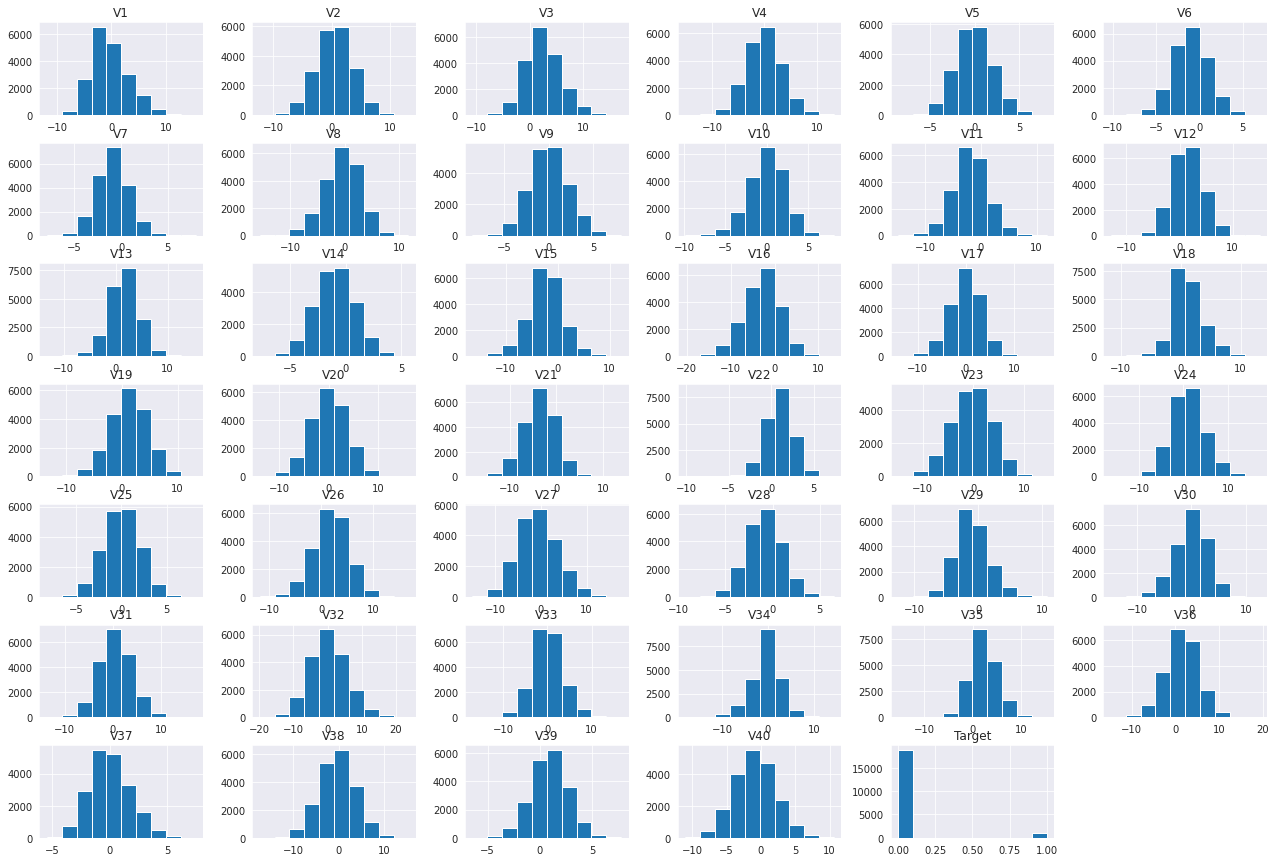

In [ ]:
sns.set_style('darkgrid')
train_data.hist(figsize= (22,15))
plt.show()

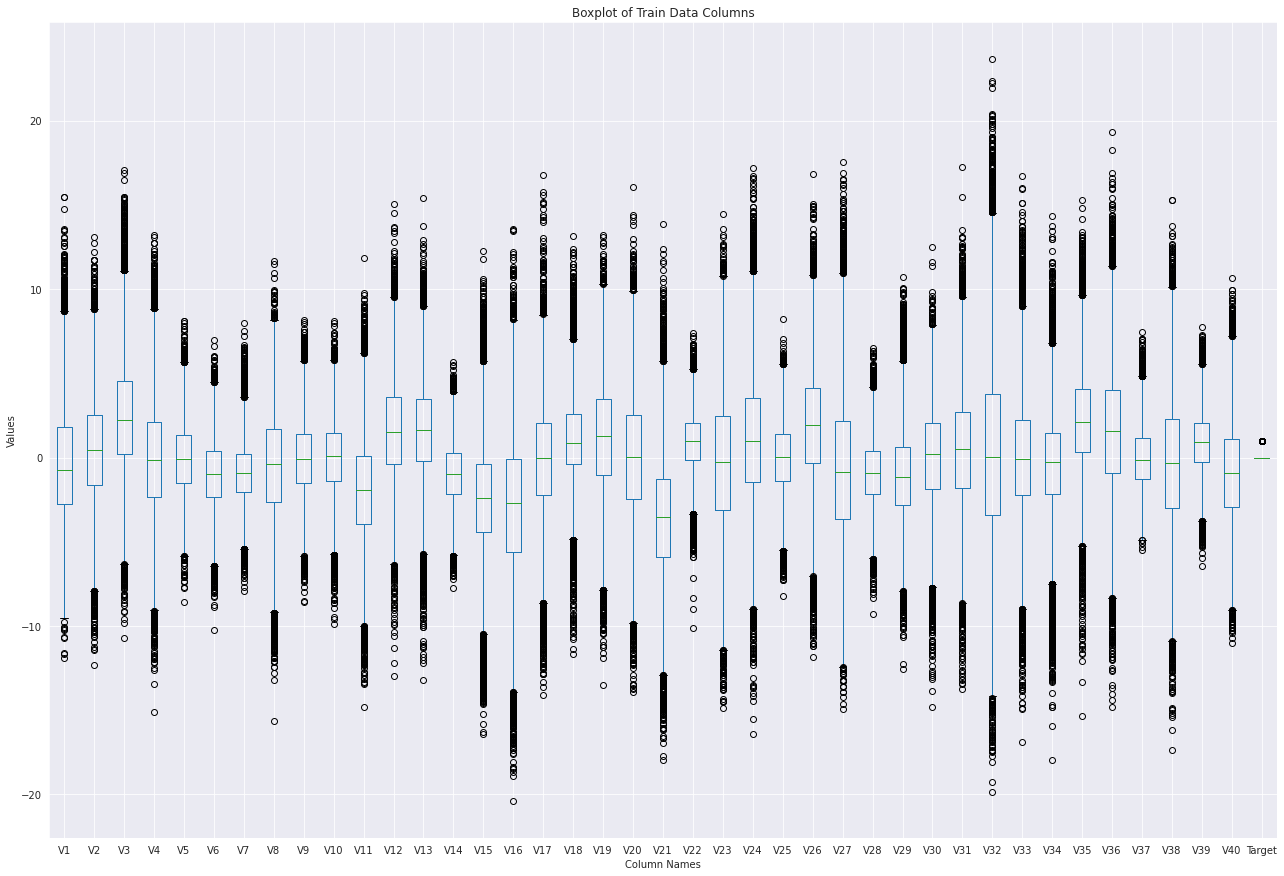

In [ ]:
sns.set_style('darkgrid')
train_data.boxplot(figsize= (22,15))

plt.title('Boxplot of Train Data Columns')
plt.xlabel('Column Names')
plt.ylabel('Values')
plt.show()

## Bivariate

In [ ]:
sns.pairplot(train_data, hue='Target', diag_kind = 'kde')
plt.show()

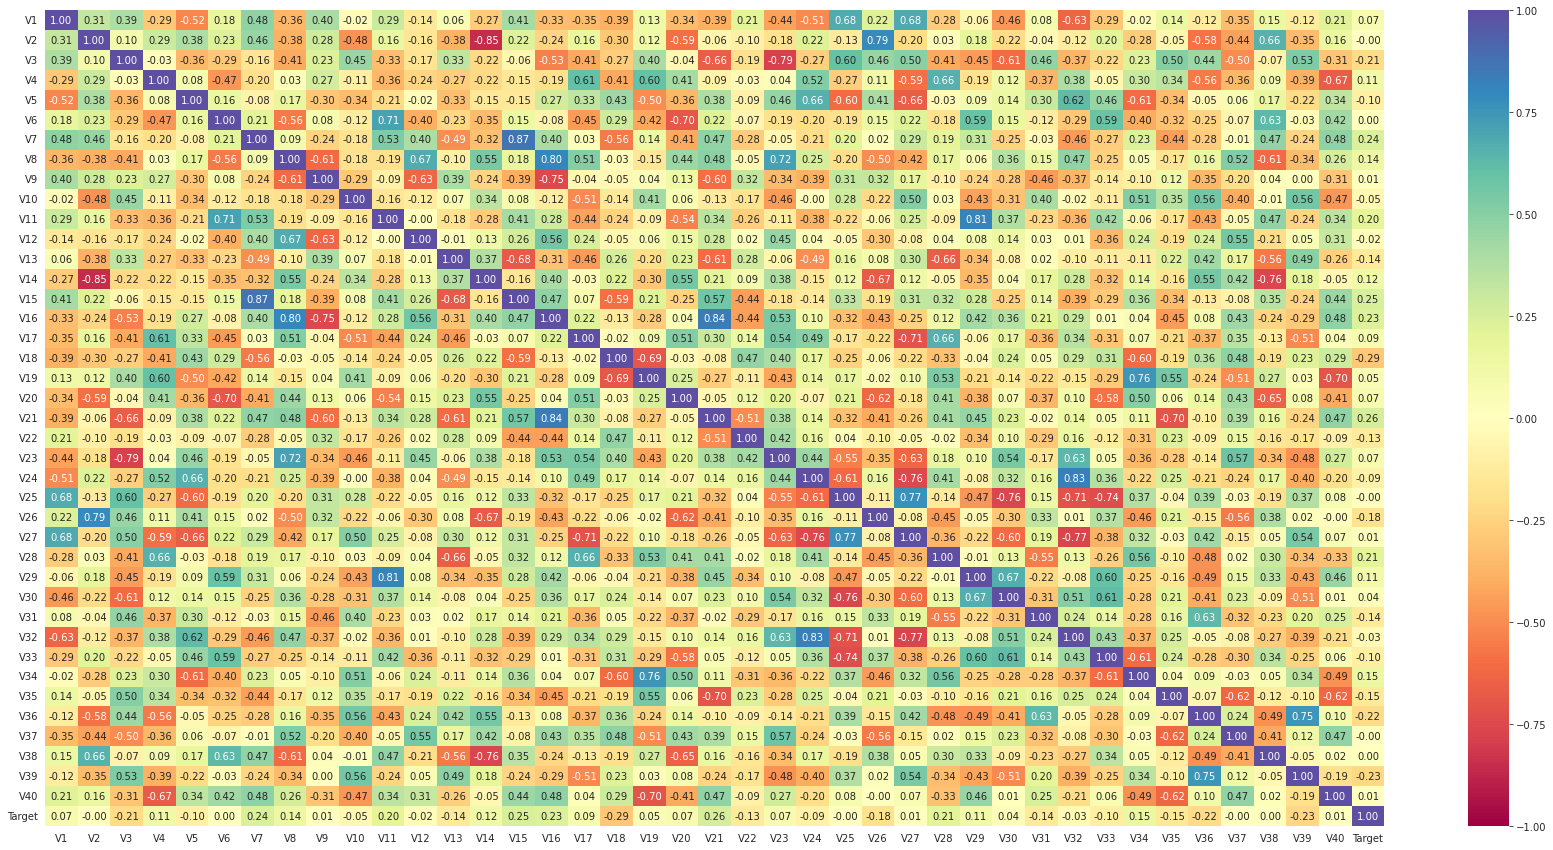

In [ ]:
plt.figure(figsize=(30, 15))
sns.heatmap(train_data.corr(), annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='Spectral')
plt.show()

# Data Pre-Processing

In [ ]:
train_data.value_counts()

V1       V2       V3       V4       V5      V6       V7      V8       V9      V10     V11      V12      V13      V14     V15      V16      V17      V18      V19      V20      V21      V22      V23      V24      V25     V26      V27      V28     V29      V30      V31      V32      V33      V34      V35      V36      V37     V38      V39     V40      Target
-11.876  -6.832   1.816    7.926    -0.579  -4.753   -6.224  4.376    -0.764  0.502   -6.517   0.380    1.876    1.396   -7.978   -0.378   6.071    2.021    4.078    12.977   -1.807   -1.525   0.582    4.365    -2.483  -4.664   -11.129  2.155   0.516    6.792    -3.009   9.152    1.606    3.726    5.373    1.928    1.921   -8.384   0.972   -6.679   0         1
0.839    -3.416   -4.502   -5.252   -3.513  1.142    2.411   2.815    -2.067  -1.643  5.199    7.702    -0.073   -0.135  2.990    3.727    0.777    1.115    0.602    2.151    2.556    1.448    3.728    -5.344   0.494   -7.609   3.053    1.221   4.304    3.802    -7.129   -9.517 

In [ ]:
test_data.value_counts()

In [ ]:
# Split train dataset into training and validation set

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=1, stratify=y)
)

In [ ]:
# Checking the number of rows and columns in the X_train data
X_train.'_______' ##  Complete the code to view dimensions of the X_train data

# Checking the number of rows and columns in the X_val data
X_val.'_______' ##  Complete the code to view dimensions of the X_val data

In [ ]:
# Dividing test data into X_test and y_test

X_test = test_data.'_______' ##  Complete the code to drop target variable from test data
y_test = test_data'_______' ##  Complete the code to store target variable in y_test



In [ ]:
# Checking the number of rows and columns in the X_test data
X_test.'_______' 
##  Complete the code to view dimensions of the X_test data

# Missing value imputation




In [ ]:
# Divide train data into X and y 
X = data.drop(["Target"], axis=1)
y = data["Target"]

In [ ]:
# initiate the imputer to replace missing values with distribution's median
imputer = SimpleImputer(strategy='median')

In [ ]:
# Fit and transform the train data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transform the validation data
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_train.columns) 
## Complete the code to impute missing values in X_val without data leakage

# Transform the test data
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_train.columns) 
## Complete the code to impute missing values in X_test without data leakage


In [ ]:
# Check the data to  see if missing values have been rplaced in train or test sets
print(X_train.isna().sum())
print('=' * 30)
print(X_val.isna().sum())
print('=' * 30)
print(X_test.isna().sum())

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V2

# Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model. 
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            'Accuracy': acc,
            'Recall': recall,
            'Precision': precision,
            'F1': f1
        },
        index=[0],
    )

    return df_perf

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [ ]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

## Model Building on original data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(('Logistic Regression', LogisticRegression(random_state=1)))
models.append(('Bagging', BaggingClassifier(random_state=1)))
models.append(('Decison Tree', DecisionTreeClassifier(random_state=1)))
models.append(('Random Forest', RandomForestClassifier(random_state=1)))
models.append(('Adaboost', AdaBoostClassifier(random_state=1)))
models.append(('Gradient', GradientBoostingClassifier(random_state=1)))


results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print('\n' 'Cross-Validation performance on training dataset:' '\n')

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, 
        X=X_train, 
        y=y_train, 
        scoring=scorer, 
        cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print('{}: {}'.format(name, cv_result.mean()))

print('\n' 'Validation Performance:' '\n')

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print('{}: {}'.format(name, scores))


Cross-Validation performance on training dataset:

Logistic Regression: 0.5121754042136208
Bagging: 0.7080597746202841
Decison Tree: 0.7375142903805324
Random Forest: 0.7311448636289402
Adaboost: 0.6299771353911481
Gradient: 0.7004246284501063

Validation Performance:

Logistic Regression: 0.44680851063829785
Bagging: 0.7051671732522796
Decison Tree: 0.7173252279635258
Random Forest: 0.7082066869300911
Adaboost: 0.5805471124620061
Gradient: 0.6838905775075987


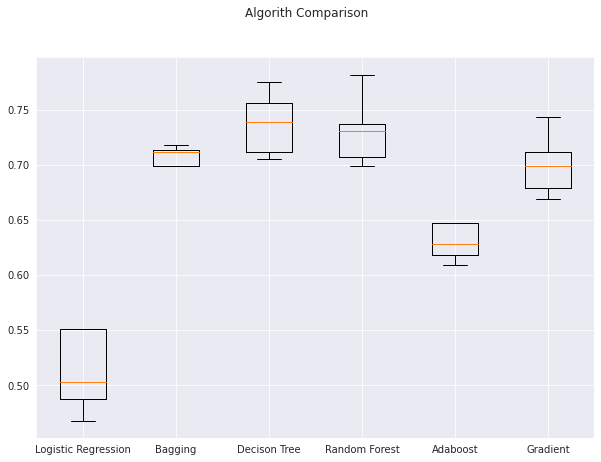

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle('Algorith Comparison')
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

### Model Building with oversampled data

In [ ]:
print('Before OverSampling, counts of label "1": {}'.format(sum(y_train == 1)))
print('Before OverSampling, counts of label "0": {} \n'.format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print('After OverSampling, counts of label "1": {}'.format(sum(y_train_over == 1)))
print('After OverSampling, counts of label "0": {} \n'.format(sum(y_train_over == 0)))


print('After OverSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

Before OverSampling, counts of label "1": 781
Before OverSampling, counts of label "0": 13219 

After OverSampling, counts of label "1": 13219
After OverSampling, counts of label "0": 13219 

After OverSampling, the shape of train_X: (26438, 40)
After OverSampling, the shape of train_y: (26438,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(('Logistic Regression', LogisticRegression(random_state=1)))
models.append(('Bagging', BaggingClassifier(random_state=1)))
models.append(('Decison Tree', DecisionTreeClassifier(random_state=1)))
models.append(('Random Forest', RandomForestClassifier(random_state=1)))
models.append(('Adaboost', AdaBoostClassifier(random_state=1)))
models.append(('Gradient', GradientBoostingClassifier(random_state=1)))

results2 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print('\n' 'Cross-Validation performance on training dataset:' '\n')

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator = model, 
        X = X_train_over, 
        y = y_train_over, 
        scoring=scorer, 
        cv=kfold
        )

    results2.append(cv_result)
    names.append(name)
    print('{}: {}'.format(name, cv_result.mean()))

print('\n' 'Validation Performance:' '\n')

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print('{}: {}'.format(name, scores))


Cross-Validation performance on training dataset:

Logistic Regression: 0.8792647263373178
Bagging: 0.9770028213709836
Decison Tree: 0.971329541740435
Random Forest: 0.9832058879591166
Adaboost: 0.8997650288519384
Gradient: 0.9232918799580773

Validation Performance:

Logistic Regression: 0.8358662613981763
Bagging: 0.8115501519756839
Decison Tree: 0.78419452887538
Random Forest: 0.8389057750759878
Adaboost: 0.8541033434650456
Gradient: 0.8844984802431611


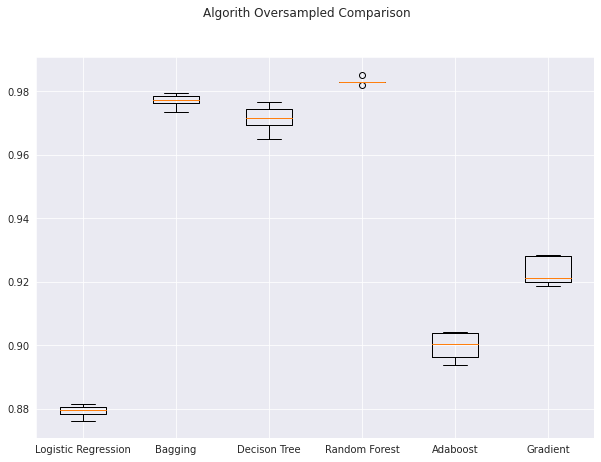

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle('Algorith Oversampled Comparison')
ax = fig.add_subplot(111)

plt.boxplot(results2)
ax.set_xticklabels(names)

plt.show() 

### Model Building with undersampled data

In [ ]:
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)


print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))


print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before UnderSampling, counts of label '1': 781
Before UnderSampling, counts of label '0': 13219 

After UnderSampling, counts of label '1': 781
After UnderSampling, counts of label '0': 781 

After UnderSampling, the shape of train_X: (1562, 40)
After UnderSampling, the shape of train_y: (1562,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(('Logistic Regression', LogisticRegression(random_state=1)))
models.append(('Bagging', BaggingClassifier(random_state=1)))
models.append(('Decison Tree', DecisionTreeClassifier(random_state=1)))
models.append(('Random Forest', RandomForestClassifier(random_state=1)))
models.append(('Adaboost', AdaBoostClassifier(random_state=1)))
models.append(('Gradient', GradientBoostingClassifier(random_state=1)))

results3 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, 
        X=X_train_un, 
        y=y_train_un , 
        scoring=scorer, 
        cv=kfold
    )  
    results3.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Logistic Regression: 0.8476400457292177
Bagging: 0.8565817409766454
Decison Tree: 0.8488731014208721
Random Forest: 0.8872856442920136
Adaboost: 0.8642087212150906
Gradient: 0.8834313245141271

Validation Performance:

Logistic Regression: 0.8358662613981763
Bagging: 0.8480243161094225
Decison Tree: 0.8389057750759878
Random Forest: 0.8814589665653495
Adaboost: 0.8541033434650456
Gradient: 0.8905775075987842


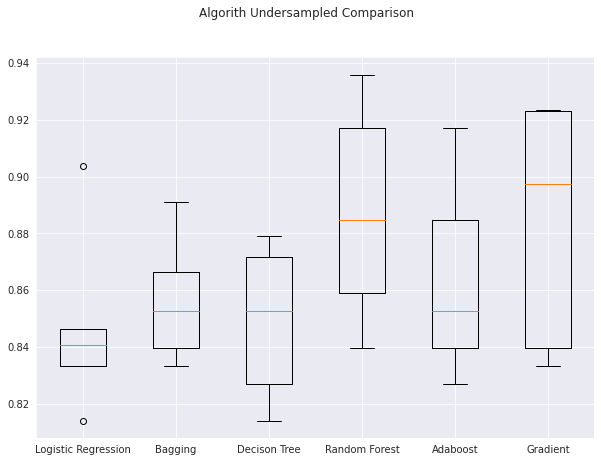

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle('Algorith Undersampled Comparison')
ax = fig.add_subplot(111)

plt.boxplot(results3)
ax.set_xticklabels(names)

plt.show() 

## Hyperparameter Tuning

### **Note**
1. Sample parameter grid has been provided to do necessary hyperparameter tuning. One can extend/reduce the parameter grid based on execution time and system configuration to try to improve the model performance further wherever needed.      
2. The models chosen in this notebook are based on test runs. One can update the best models as obtained upon code execution and tune them for best performance.



## Tuning AdaBoost using oversampled data

In [ ]:
%%time 

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), 
                       DecisionTreeClassifier(max_depth=2, random_state=1), 
                       DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, 
                                   param_distributions=param_grid, 
                                   n_iter=50, 
                                   n_jobs = -1, 
                                   scoring=scorer, 
                                   cv=5, 
                                   random_state=1
                                   )

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over) 

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 200, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9739012308366863:
CPU times: user 1min 45s, sys: 9.3 s, total: 1min 55s
Wall time: 5min 12s


In [ ]:
# Create a new pipeline with best parameters
tuned_adaboost = AdaBoostClassifier(
    n_estimators= 200, 
    learning_rate= 0.2, 
    base_estimator= DecisionTreeClassifier(max_depth=3, random_state=1)
) 

tuned_adaboost.fit(X_train_over, y_train_over)
 

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=200)

In [ ]:
adaboost_train_perf = model_performance_classification_sklearn(tuned_adaboost, X_train_over, y_train_over)
adaboost_train_perf

Accuracy  Recall  Precision    F1
0     0.993   0.990      0.996 0.993

In [ ]:
adaboost_val_perf = model_performance_classification_sklearn(tuned_adaboost, X_val, y_val)
adaboost_val_perf

Accuracy  Recall  Precision    F1
0     0.984   0.869      0.836 0.852

## Tuning Random forest using undersampled data

In [ ]:
%%time 

# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, 
                                   param_distributions=param_grid, 
                                   n_iter=50, 
                                   n_jobs = -1, 
                                   scoring=scorer, 
                                   cv=5, 
                                   random_state=1
                                   )

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)


print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 200, 'min_samples_leaf': 3, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.8924220153519518:
CPU times: user 2.16 s, sys: 0 ns, total: 2.16 s
Wall time: 8.15 s


In [ ]:
# Create new pipeline with best parameters
tuned_rf2 = RandomForestClassifier(
    max_features='sqrt',
    random_state=1,
    max_samples=0.6,
    n_estimators=200,
    min_samples_leaf= 3,
)

tuned_rf2.fit(X_train_un,y_train_un)

RandomForestClassifier(max_samples=0.6, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

In [ ]:
rf2_train_perf = model_performance_classification_sklearn(tuned_rf2, X_train_un, y_train_un)
rf2_train_perf

Accuracy  Recall  Precision    F1
0     0.960   0.928      0.990 0.958

In [ ]:
rf2_val_perf = model_performance_classification_sklearn(tuned_rf2, X_val, y_val)
rf2_val_perf

Accuracy  Recall  Precision    F1
0     0.949   0.888      0.522 0.658

## Tuning Gradient Boosting using oversampled data

In [ ]:
%%time 

# defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid={"n_estimators": np.arange(100,150,25), 
            "learning_rate": [0.2, 0.05, 1], 
            "subsample":[0.5,0.7], 
            "max_features":[0.5,0.7]
            }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, 
                                   param_distributions=param_grid, 
                                   scoring=scorer, 
                                   n_iter=50, 
                                   n_jobs = -1, 
                                   cv=5, 
                                   random_state=1
                                   )

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 1} with CV score=0.9704971829220336:
CPU times: user 21.1 s, sys: 0 ns, total: 21.1 s
Wall time: 1min 44s


In [ ]:
# Create new pipeline with best parameters
tuned_gbm = GradientBoostingClassifier(
    max_features=0.5,
    random_state=1,
    learning_rate=1,
    n_estimators=125,
    subsample=0.7,
)

tuned_gbm.fit(X_train_over, y_train_over)

GradientBoostingClassifier(learning_rate=1, max_features=0.5, n_estimators=125,
                           random_state=1, subsample=0.7)

In [ ]:
gbm_train_perf = model_performance_classification_sklearn(tuned_gbm , X_train_over, y_train_over)
gbm_train_perf

Accuracy  Recall  Precision    F1
0     0.995   0.995      0.995 0.995

In [ ]:
gbm_val_perf = model_performance_classification_sklearn(tuned_gbm , X_val, y_val)
gbm_val_perf

Accuracy  Recall  Precision    F1
0     0.968   0.827      0.663 0.736

## Tuning XGBoost using oversampled data

In [ ]:
%%time 

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':[150,200,250],
            'scale_pos_weight':[5,10], 
            'learning_rate':[0.1,0.2], 
            'gamma':[0,3,5],
            'subsample':[0.8,0.9]
            }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, 
                                   param_distributions=param_grid, 
                                   n_iter=50, 
                                   n_jobs = -1, 
                                   scoring=scorer, 
                                   cv=5, 
                                   random_state=1
                                   )

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)


print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))



Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'n_estimators': 150, 'learning_rate': 0.1, 'gamma': 3} with CV score=0.99704963815588:
CPU times: user 1min 42s, sys: 25.4 ms, total: 1min 42s
Wall time: 6min 40s


In [ ]:
xgb2 = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.8,
    scale_pos_weight=10,
    n_estimators=150,
    learning_rate=0.1,
    gamma=3,
)

xgb2.fit(X_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

In [ ]:
xgb2_train_perf =  model_performance_classification_sklearn(xgb2 , X_train_over, y_train_over) 
xgb2_train_perf

Accuracy  Recall  Precision    F1
0     0.994   1.000      0.989 0.994

In [ ]:
xgb2_val_perf =  model_performance_classification_sklearn(xgb2 , X_val, y_val) 
xgb2_val_perf

Accuracy  Recall  Precision    F1
0     0.969   0.888      0.659 0.756

## Model performance comparison and choosing the final model

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm_train_perf.T,
        adaboost_train_perf.T,
        rf2_train_perf.T,
        xgb2_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient Boosting tuned with oversampled data",
    "AdaBoost classifier tuned with oversampled data",
    "Random forest tuned with undersampled data",
    "XGBoost tuned with oversampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Gradient Boosting tuned with oversampled data  \
Accuracy                                           0.995   
Recall                                             0.995   
Precision                                          0.995   
F1                                                 0.995   

           AdaBoost classifier tuned with oversampled data  \
Accuracy                                             0.993   
Recall                                               0.990   
Precision                                            0.996   
F1                                                   0.993   

           Random forest tuned with undersampled data  \
Accuracy                                        0.960   
Recall                                          0.928   
Precision                                       0.990   
F1                                              0.958   

           XGBoost tuned with oversampled data  
Accuracy                                 0.994  
Recall                                   1.000  
Precision                                0.989  
F1                                       0.994

In [ ]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        gbm_val_perf.T,
        adaboost_val_perf.T,
        rf2_val_perf.T,
        xgb2_val_perf.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Gradient Boosting tuned with oversampled data",
    "AdaBoost classifier tuned with oversampled data",
    "Random forest tuned with undersampled data",
    "XGBoost tuned with oversampled data",
]
print("Validation performance comparison:")
models_val_comp_df


Validation performance comparison:


Gradient Boosting tuned with oversampled data  \
Accuracy                                           0.968   
Recall                                             0.827   
Precision                                          0.663   
F1                                                 0.736   

           AdaBoost classifier tuned with oversampled data  \
Accuracy                                             0.984   
Recall                                               0.869   
Precision                                            0.836   
F1                                                   0.852   

           Random forest tuned with undersampled data  \
Accuracy                                        0.949   
Recall                                          0.888   
Precision                                       0.522   
F1                                              0.658   

           XGBoost tuned with oversampled data  
Accuracy                                 0.969  
Recall                                   0.888  
Precision                                0.659  
F1                                       0.756

**Now we have our final model, so let's find out how our final model is performing on unseen test data.**

In [ ]:
# Let's check the performance on test set
rf2_test_perf =  model_performance_classification_sklearn(tuned_rf2, X_test, y_test)
rf2_test_perf


Accuracy  Recall  Precision    F1
0     0.953   0.865      0.551 0.673

### Feature Importances

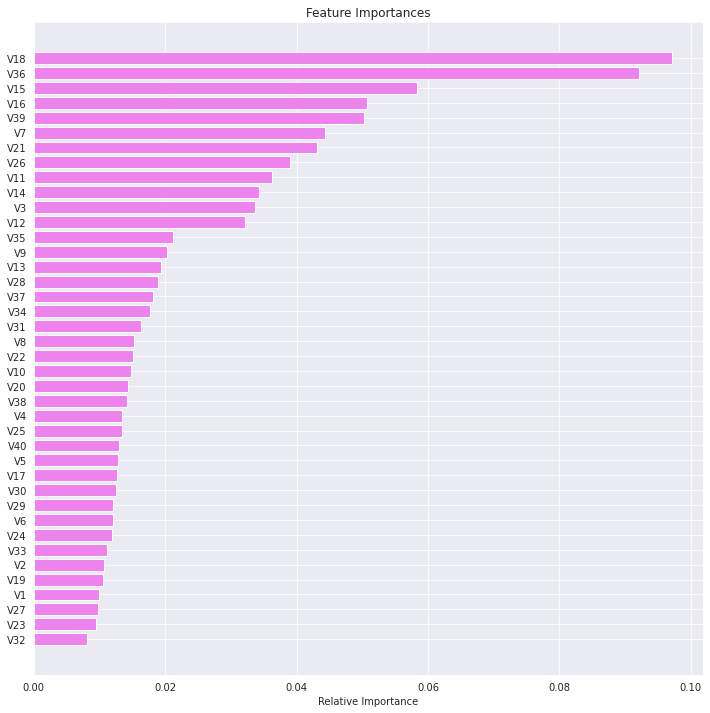

In [ ]:
feature_names = X_train.columns
importances =  tuned_rf2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Let's use Pipelines to build the final model

- Since we have only one datatype in the data, we don't need to use column transformer here

In [ ]:
model_pipe = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        (
            'Tuned Random Forest',
            RandomForestClassifier(
            max_features='sqrt',
            random_state=1,
            max_samples=0.6,
            n_estimators=200,
            min_samples_leaf= 3,
        ),
        ),
    ]
)

In [ ]:
model_pipe

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('Tuned Random Forest',
                 RandomForestClassifier(max_samples=0.6, min_samples_leaf=3,
                                        n_estimators=200, random_state=1))])

In [ ]:
# Divide train data into X and y 
X1 = train_data.drop(['Target'], axis=1)
y1 = train_data['Target']

# Divide test data into X and y as well
X_test1 = test_data.drop(['Target'], axis=1)
y_test1 = test_data['Target']

In [ ]:
# Separating target variable and other variables
X2 = train_data.drop(columns="Target")
Y2 = train_data["Target"]

# Since we already have a separate test set, we don't need to divide data into train and test

X_test2 = test_data.drop(columns="Target")
y_test2 = test_data["Target"]


In [ ]:
# We can't oversample/undersample data without doing missing value treatment, so let's first treat the missing values in the train set
imputer = SimpleImputer(strategy = 'median')
X1 = imputer.fit_transform(X1)

# We don't need to impute missing values in test set as it will be done inside pipeline

**Note:** Please perform either oversampling or undersampling based on the final model chosen.

If the best model is built on the oversampled data, uncomment and run the below code to perform oversampling

In [ ]:
# #code for oversampling on the data
# # Synthetic Minority Over Sampling Technique
# sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
# X_over1, y_over1 = sm.fit_resample(X1, Y1)

If the best model is built on the undersampled data, uncomment and run the below code to perform undersampling


In [ ]:
# code for undersampling on the data
# Under Sampling Technique
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un1, y_train_un1 = rus.fit_resample(X1, y1)

In [ ]:
#check the performance on undersample train set
model_pipe.fit(X_train_un1, y_train_un1)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('Tuned Random Forest',
                 RandomForestClassifier(max_samples=0.6, min_samples_leaf=3,
                                        n_estimators=200, random_state=1))])

In [ ]:
# check model performance on test set
pipeline_model_test =  model_performance_classification_sklearn(model_pipe, X_test1, y_test1)
pipeline_model_test

Accuracy  Recall  Precision    F1
0     0.946   0.872      0.514 0.647

# Business Insights and Conclusions


- Best model and its performance
- Important features
- Additional points

***